In [104]:
import matplotlib.pyplot as plt
import numpy.random as nrand
import numpy as np

In [994]:
def draw_polygon(dots,mid_point_usage,midpoint):
    if mid_point_usage == True:
        if len(dots) == 2:
            line2 = plt.Polygon([dots[0],dots[1],midpoint], closed=True, fill='b', edgecolor=None)
            plt.gca().add_line(line2)
        if len(dots) == 3:
            line2 = plt.Polygon([dots[0],dots[1],midpoint], closed=True, fill='b', edgecolor=None)
            line3 = plt.Polygon([dots[0],dots[2],midpoint], closed=True, fill='b', edgecolor=None)
            line4 = plt.Polygon([dots[1],dots[2],midpoint], closed=True, fill='b', edgecolor=None)
            plt.gca().add_line(line2)
            plt.gca().add_line(line3)
            plt.gca().add_line(line4)
    line = plt.Polygon(dots, closed=True, fill='b', edgecolor=None)
    plt.gca().add_line(line)
    

In [672]:
def rotate_2(dots):
    return np.vstack((-dots[:,1],dots[:,0])).T
def rotate_3(dots):
    return -dots
def rotate_4(dots):
    return np.vstack((dots[:,1],-dots[:,0])).T
def adjust_pos(dots_11,dots_12,dots_21,dots_22,pos,quadrant):
    x,y = pos
    midpoint = {}
    midpoint['11'] = [x+1,y+1]
    midpoint['12'] = [x+1,y+3]
    midpoint['21'] = [x+3,y+1]
    midpoint['22'] = [x+3,y+3]
    
    dots_11 = dots_11 + [x,y]
    dots_12 = dots_12 + [x,y]
    dots_21 = dots_21 + [x,y]
    dots_22 = dots_22 + [x,y]
    if quadrant == 2:
        dots_11 = rotate_2(dots_11)
        dots_12 = rotate_2(dots_12)
        dots_21 = rotate_2(dots_21)
        dots_22 = rotate_2(dots_22)
        for i in ['11','12','21','22']:
            midpoint[i] = [-midpoint[i][1],midpoint[i][0]]
    elif quadrant == 3:
        dots_11 = rotate_3(dots_11)
        dots_12 = rotate_3(dots_12)
        dots_21 = rotate_3(dots_21)
        dots_22 = rotate_3(dots_22)
        for i in ['11','12','21','22']:
            midpoint[i] = [-midpoint[i][0],-midpoint[i][1]]

    elif quadrant == 4:
        dots_11 = rotate_4(dots_11)
        dots_12 = rotate_4(dots_12)
        dots_21 = rotate_4(dots_21)
        dots_22 = rotate_4(dots_22)
        for i in ['11','12','21','22']:
            midpoint[i] = [midpoint[i][1],-midpoint[i][0]]
    
    return (dots_11,dots_12,dots_21,dots_22,midpoint)
    

In [971]:
def draw_quater(pattern_11,pattern_12,pattern_21,pattern_22,pos,quadrant):
    
    x,y = pos
    dots_11,mid_point_usage_11 = pattern_11
    dots_12,mid_point_usage_12 = pattern_12
    dots_21,mid_point_usage_21 = pattern_21
    dots_22,mid_point_usage_22 = pattern_22
    
    dots_11,dots_12,dots_21,dots_22,midpoint = adjust_pos(dots_11,dots_12,dots_21,dots_22,pos,quadrant)
    
    draw_polygon(dots_11,mid_point_usage_11, midpoint['11'])
    draw_polygon(dots_12,mid_point_usage_12, midpoint['12'])
    draw_polygon(dots_21,mid_point_usage_21, midpoint['21'])
    draw_polygon(dots_22,mid_point_usage_22, midpoint['22'])
    #plt.rcParams["figure.figsize"] = (5,5)
    #plt.xlim(-8,8)
    #plt.ylim(-8,8)

In [542]:
def draw_side(pattern_11,pattern_12,pattern_21,pattern_22):
    dots_11,mid_point_usage_11 = pattern_11
    dots_12,mid_point_usage_12 = pattern_12
    dots_21,mid_point_usage_21 = pattern_21
    dots_22,mid_point_usage_22 = pattern_22
    print(dots_12)
    dots_12 = dots_12 + [0,2]
    dots_21 = dots_21 + [2,0]
    dots_22 = dots_22 + [2,2]

    pattern = 
    draw_quater(pattern,mid_point_usage,(0,4))
    draw_quater(pattern,mid_point_usage,(4,0))

In [758]:
def quater_initiate(n):
    '''
    n -- number of points to randomize
    dot -- list of randomized points
    dot_ordered -- list of non-redundant points within a certain order for pyplot to draw the polygon
    coordinate -- a np.array of points search through
    mid_point_usage -- if the middle point is used in polygon drawing
    '''
    dot = []
    dot_ordered = []
    coordinate = np.array([[0,0],[0,1],[0,2],[1,2],[2,2],[2,1],[2,0],[1,0]])
    mid_point_usage = False
    for i in range(n):
        dot.append([nrand.randint(3),nrand.randint(3)])
    
    for i in coordinate:
        if list(i) in dot:
            dot_ordered.append(i)
            
    if len(dot_ordered) == 0:
        dot_ordered.append([0,0])
    dot_ordered = np.array(dot_ordered)
    if [1,1] in dot:
        mid_point_usage = True
    #draw_polygon(dot_ordered,mid_point_usage)
    return (dot_ordered,mid_point_usage)

In [759]:
def center_initiate(n):
    dots, mid_point_usage = quater_initiate(n)
    dots_11 = dots
    dots_12 = np.vstack((dots[:,0],4-dots[:,1])).T
    dots_21 = np.vstack((4-dots[:,0],dots[:,1])).T
    dots_22 = np.vstack((4-dots_12[:,0],dots_12[:,1])).T
    draw_quater((dots_11,mid_point_usage),(dots_12,mid_point_usage),(dots_21,mid_point_usage),(dots_22,mid_point_usage),(0,0),1)
    draw_quater((dots_11,mid_point_usage),(dots_12,mid_point_usage),(dots_21,mid_point_usage),(dots_22,mid_point_usage),(0,0),2)
    draw_quater((dots_11,mid_point_usage),(dots_12,mid_point_usage),(dots_21,mid_point_usage),(dots_22,mid_point_usage),(0,0),3)
    draw_quater((dots_11,mid_point_usage),(dots_12,mid_point_usage),(dots_21,mid_point_usage),(dots_22,mid_point_usage),(0,0),4)


In [760]:
def side_initiate(n):
    dots_11, mid_point_usage_11 = quater_initiate(n)
    dots_12, mid_point_usage_12 = quater_initiate(n)
    dots_21, mid_point_usage_21 = quater_initiate(n)
    dots_22, mid_point_usage_22 = quater_initiate(n)
    dots_12 = dots_12 + [0,2]
    dots_21 = dots_21 + [2,0]
    dots_22 = dots_22 + [2,2]
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(0,4),1)
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(0,4),2)
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(0,4),3)
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(0,4),4)
    
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(4,0),1)
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(4,0),2)
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(4,0),3)
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(4,0),4)

In [761]:
def corner_initiate(n):
    dots_11, mid_point_usage_11 = quater_initiate(n)
    dots_12, mid_point_usage_12 = quater_initiate(n)
    dots_21, mid_point_usage_21 = quater_initiate(n)
    dots_22, mid_point_usage_22 = quater_initiate(n)
    dots_12 = dots_12 + [0,2]
    dots_21 = dots_21 + [2,0]
    dots_22 = dots_22 + [2,2]
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(4,4),1)
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(4,4),2)
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(4,4),3)
    draw_quater((dots_11,mid_point_usage_11),(dots_12,mid_point_usage_12),(dots_21,mid_point_usage_21),(dots_22,mid_point_usage_22),(4,4),4)
    
    
    
    

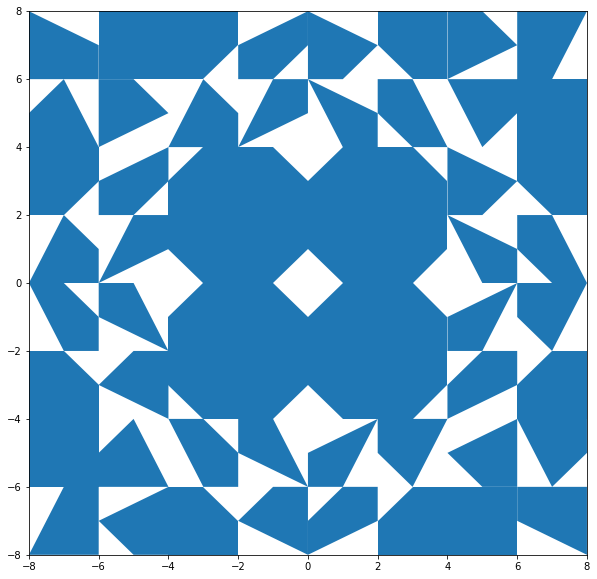

In [995]:
center_initiate(nrand.randint(3,10))
side_initiate(nrand.randint(3,10))
corner_initiate(nrand.randint(3,10))
plt.rcParams["figure.figsize"] = (10,10)
plt.xlim(-8,8)
plt.ylim(-8,8)
#plt.savefig('test.pdf')
plt.show()